In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Fraud.csv")
data=pd.DataFrame(df)

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


#No missing values

In [9]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#No duplicates

In [10]:
data.duplicated().sum()

0

#Feature Selection

In [11]:
numeric_data = data.select_dtypes(include=['number'])

In [12]:
correlation=numeric_data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


#Removing negatively co-related columns

In [13]:
modified_data=data.drop(columns=["oldbalanceDest","newbalanceOrig"],axis=1)
modified_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


#Analyzing data

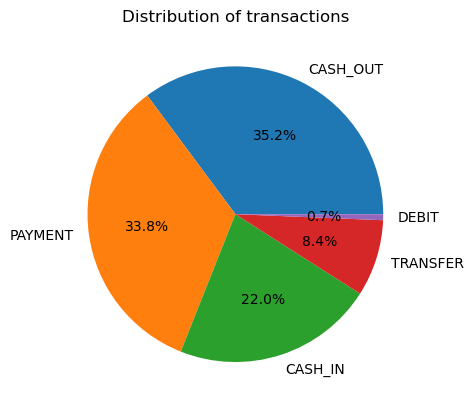

In [14]:
type=data["type"].value_counts()
transactions=type.index
quantity=type.values
plt.pie(quantity,labels=transactions,autopct='%1.1f%%')
plt.title("Distribution of transactions")
plt.show()

#We can see that mostly cash_out and transfer type transactions are vulnerable to fraud

In [15]:
filtered_data = data[data["isFraud"] == 1]
print(filtered_data["type"].value_counts())

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


#Mapping is required to be done on the type column as they are of string type

In [16]:
modified_data["type"]=modified_data["type"].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})
modified_data["isFraud"]=modified_data["isFraud"].map({0:"No_Fraud",1:"Fraud"})
#modified_data.drop(data["isfraud"],axis=1,inplace=True)
modified_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,M1979787155,0.0,No_Fraud,0
1,1,2,1864.28,C1666544295,21249.0,M2044282225,0.0,No_Fraud,0
2,1,4,181.00,C1305486145,181.0,C553264065,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,C38997010,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,M1230701703,0.0,No_Fraud,0


#Spliting the data set into training and testing set

In [17]:
X = np.array(modified_data[["type","amount","oldbalanceOrg","newbalanceDest"]])
Y = np.array(modified_data["isFraud"])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Reducing Overfitting

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, Y,stratify=Y,test_size=0.1,random_state=2)

In [52]:
model=LogisticRegression(class_weight='balanced')

In [53]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [54]:
x_train_prediction=model.predict(X_train)

In [55]:
acc_sc=accuracy_score(x_train_prediction,y_train)
acc_sc

0.8957665587795943

In [56]:
X_test_prediction=model.predict(X_test)

In [57]:
acc_sc_test=accuracy_score(X_test_prediction,y_test)
acc_sc_test

0.8954848788706539

In [59]:
feature=np.array([[4,9000.0,9000.0,0.0]])
print(model.predict(feature))

['Fraud']


In [60]:
feature1=np.array([[4,9000.0,9000.0,15000.0]])
print(model.predict(feature1))

['No_Fraud']
